In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import uuid

In [2]:
mp_draw = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [52]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence = 0.5) as hands:
    while cap.isOpened():
        ret , frame = cap.read()
        
        # BGR 2 RGB
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)# helps in recoloring a image to our interest
        img.flags.writeable = False
        
        # detecting
        results = hands.process(img)
        img.flags.writeable = True
        
        # RGB 2 BGR
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        print(results)
        
        if results.multi_hand_landmarks:
            for num,hand in enumerate(results.multi_hand_landmarks):
                mp_draw.draw_landmarks(img,hand,mp_hands.HAND_CONNECTIONS,
                                      mp_draw.DrawingSpec(color = (250,22,76),thickness = 2,circle_radius = 2),
                                      mp_draw.DrawingSpec(color = (250,0,250),thickness = 2,circle_radius = 2),)
        
        cv2.imshow('Hand tracking',img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [5]:
results.multi_hand_landmarks

[landmark {
   x: 0.6278560757637024
   y: 0.9254617691040039
   z: 1.8681751612348307e-07
 }
 landmark {
   x: 0.6353222131729126
   y: 0.9529035687446594
   z: -0.010146076790988445
 }
 landmark {
   x: 0.6587508916854858
   y: 0.9791710376739502
   z: -0.012623644433915615
 }
 landmark {
   x: 0.6807588338851929
   y: 0.9933900237083435
   z: -0.014252115972340107
 }
 landmark {
   x: 0.7000734210014343
   y: 1.0004700422286987
   z: -0.015120575204491615
 }
 landmark {
   x: 0.6923346519470215
   y: 0.9566695094108582
   z: -0.0037241510581225157
 }
 landmark {
   x: 0.7241016626358032
   y: 0.9711557626724243
   z: -0.011357607319951057
 }
 landmark {
   x: 0.7453214526176453
   y: 0.9839813113212585
   z: -0.018092980608344078
 }
 landmark {
   x: 0.760222852230072
   y: 0.9940475225448608
   z: -0.022228045389056206
 }
 landmark {
   x: 0.6976829767227173
   y: 0.9507690072059631
   z: -0.0024920578580349684
 }
 landmark {
   x: 0.7293082475662231
   y: 0.9654525518417358
   z: 

In [9]:
mp_hands.HandLandmark.WRIST

<HandLandmark.WRIST: 0>

In [7]:
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.WRIST] # gives the position of the wrist

x: 0.6278560757637024
y: 0.9254617691040039
z: 1.8681751612348307e-07

In [10]:
mp_hands.HandLandmark.PINKY_TIP

<HandLandmark.PINKY_TIP: 20>

In [13]:
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_TIP]

x: 0.7394770383834839
y: 0.9847387671470642
z: -0.006295109633356333

In [11]:
results.multi_handedness

[classification {
   index: 0
   score: 0.7669497728347778
   label: "Left"
 }]

In [14]:
results.multi_handedness[0].classification

[index: 0
score: 0.7669497728347778
label: "Left"
]

In [16]:
results.multi_handedness[0].classification[0].index

0

In [17]:
results.multi_handedness[0].classification[0].label

'Left'

In [53]:
# defining a function to add a label to hand either its left or right

def label(index,hand,results):
    output = None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index == index:
            
            label = classification.classification[0].label
            score = classification.classification[0].score
            text = '{} {}'.format(label,round(score,2))
            
            coord = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x,hand.landmark[mp_hands.HandLandmark.WRIST].y)),
                [640,480]).astype(int))
            output = text,coord
            
    return output
            

In [22]:
label(num,hand,results)

('Left 0.77', (401, 444))

In [54]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence = 0.5) as hands:
    while cap.isOpened():
        ret , frame = cap.read()
        
        # BGR 2 RGB
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)# helps in recoloring a image to our interest
        img.flags.writeable = False
        
        # detecting
        results = hands.process(img)
        img.flags.writeable = True
        
        # RGB 2 BGR
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        print(results)
        
        if results.multi_hand_landmarks:
            for num,hand in enumerate(results.multi_hand_landmarks):
                mp_draw.draw_landmarks(img,hand,mp_hands.HAND_CONNECTIONS,
                                      mp_draw.DrawingSpec(color = (250,22,76),thickness = 2,circle_radius = 2),
                                      mp_draw.DrawingSpec(color = (250,0,250),thickness = 2,circle_radius = 2),)
                
                if label(num,hand,results):
                    text,coord = label(num,hand,results)
                    cv2.putText(img,text,coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        cv2.imshow('Hand tracking',img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

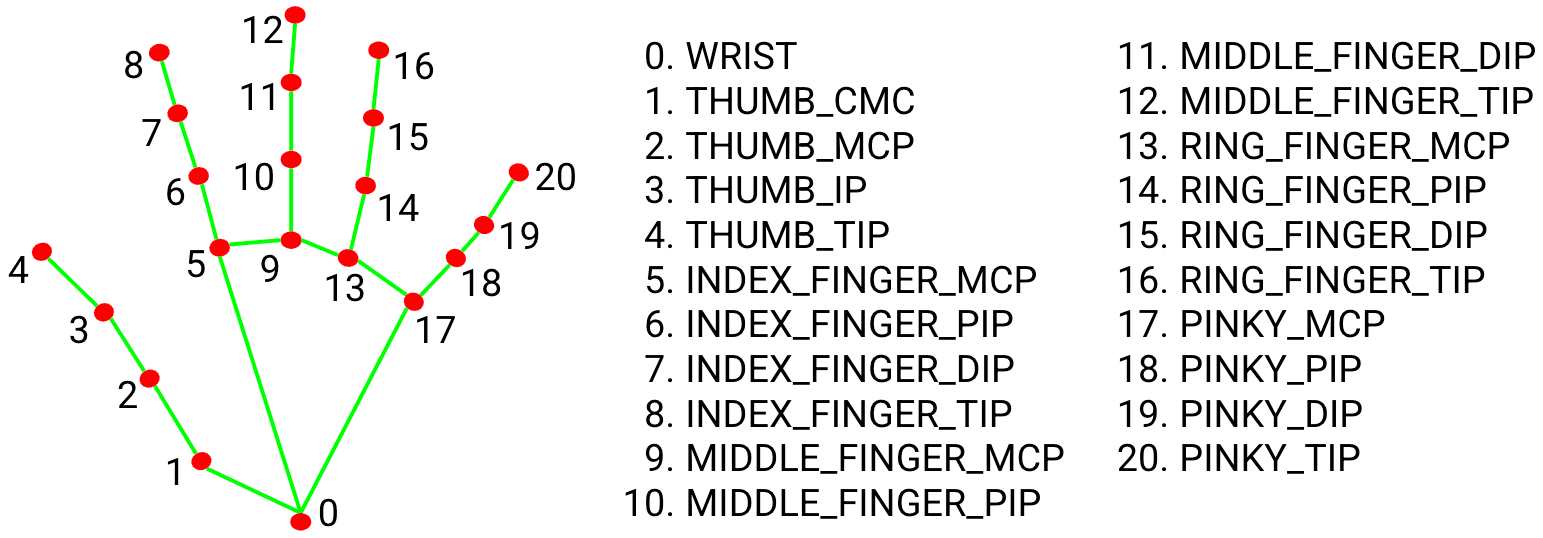

image takent from :https://google.github.io/mediapipe/solutions/hands.html

In [28]:
joint_list = [[8,7,6],[12,11,10]]

In [30]:
joint_list[0],joint_list[1]

([8, 7, 6], [12, 11, 10])

In [33]:
hand = results.multi_hand_landmarks[0]

In [34]:
hand.landmark

[x: 0.701666533946991
y: 0.6774959564208984
z: 3.1301064495892206e-07
, x: 0.663948655128479
y: 0.6655338406562805
z: -0.016067493706941605
, x: 0.6274856328964233
y: 0.6446965336799622
z: -0.02623612806200981
, x: 0.5955377221107483
y: 0.6328388452529907
z: -0.03556579723954201
, x: 0.567667543888092
y: 0.6291465759277344
z: -0.04500634968280792
, x: 0.6512048840522766
y: 0.5518319606781006
z: -0.011900126934051514
, x: 0.6378426551818848
y: 0.5034011006355286
z: -0.02044835314154625
, x: 0.6311546564102173
y: 0.47302109003067017
z: -0.028265058994293213
, x: 0.6267430782318115
y: 0.4471377730369568
z: -0.034626491367816925
, x: 0.6751011610031128
y: 0.5419230461120605
z: -0.013204177841544151
, x: 0.675943911075592
y: 0.4852125942707062
z: -0.018550200387835503
, x: 0.6778953671455383
y: 0.4524265229701996
z: -0.024031445384025574
, x: 0.6804015040397644
y: 0.42520612478256226
z: -0.028973383828997612
, x: 0.6983234286308289
y: 0.5451488494873047
z: -0.017235493287444115
, x: 0.70445

In [35]:
joint = joint_list[0]

In [36]:
hand.landmark[joint[0]]

x: 0.6267430782318115
y: 0.4471377730369568
z: -0.034626491367816925

In [37]:
hand.landmark[joint[1]]

x: 0.6311546564102173
y: 0.47302109003067017
z: -0.028265058994293213

In [38]:
np.array([hand.landmark[joint[0]].x,hand.landmark[joint[0]].y])

array([0.62674308, 0.44713777])

putting all the above steps in to a fuction 

In [63]:
def angles(img,results,joint_list):
    
    # looping through hands
    for hand in results.multi_hand_landmarks:
        
        # looping through joints
        for joint in joint_list:
            
            # coordinates of the joints
            a = np.array([hand.landmark[joint[0]].x,hand.landmark[joint[0]].y])
            b = np.array([hand.landmark[joint[1]].x,hand.landmark[joint[1]].y])
            c = np.array([hand.landmark[joint[2]].x,hand.landmark[joint[2]].y])
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(img, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
    return img
            
            

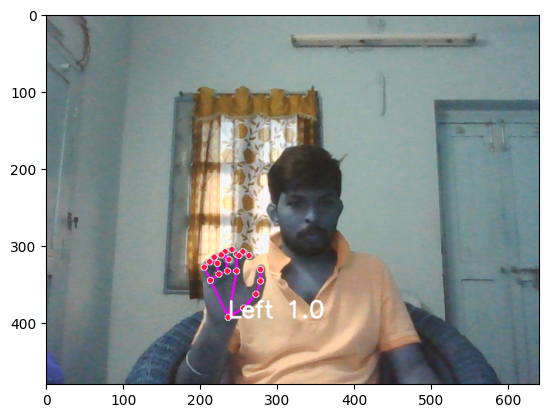

In [64]:
plt.imshow(img)

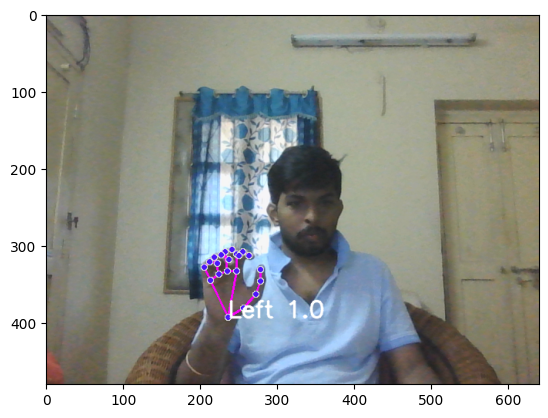

In [65]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
test_img  = angles(img,results,joint_list)

In [67]:
test_img

array([[[126, 142, 152],
        [133, 147, 152],
        [128, 139, 140],
        ...,
        [113, 140, 148],
        [119, 144, 153],
        [115, 140, 149]],

       [[127, 135, 139],
        [130, 140, 143],
        [127, 138, 139],
        ...,
        [111, 137, 148],
        [114, 139, 150],
        [115, 139, 150]],

       [[124, 130, 134],
        [124, 131, 134],
        [123, 132, 133],
        ...,
        [117, 139, 154],
        [120, 139, 155],
        [119, 138, 154]],

       ...,

       [[ 53,  59, 100],
        [ 53,  61, 101],
        [ 52,  61, 101],
        ...,
        [ 90, 105, 110],
        [ 89, 104, 109],
        [ 87, 101, 107]],

       [[ 60,  60, 101],
        [ 57,  61,  99],
        [ 52,  60,  93],
        ...,
        [ 89, 106, 111],
        [ 88, 105, 110],
        [ 87, 104, 109]],

       [[ 59,  62,  99],
        [ 56,  62,  97],
        [ 50,  59,  92],
        ...,
        [ 89, 106, 111],
        [ 87, 104, 109],
        [ 87, 104, 109]]

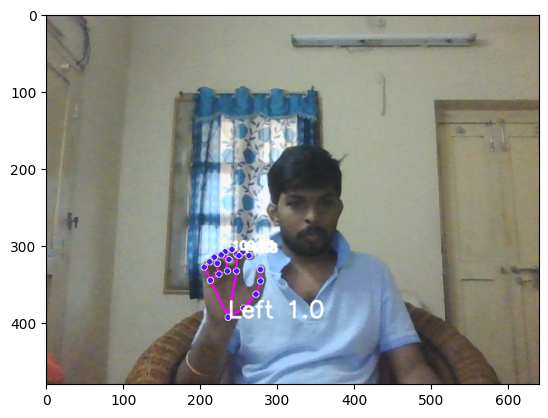

In [68]:
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence = 0.5) as hands:
    while cap.isOpened():
        ret , frame = cap.read()
        
        # BGR 2 RGB
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)# helps in recoloring a image to our interest
        img.flags.writeable = False
        
        # detecting
        results = hands.process(img)
        img.flags.writeable = True
        
        # RGB 2 BGR
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        print(results)
        
        if results.multi_hand_landmarks:
            for num,hand in enumerate(results.multi_hand_landmarks):
                mp_draw.draw_landmarks(img,hand,mp_hands.HAND_CONNECTIONS,
                                      mp_draw.DrawingSpec(color = (250,22,76),thickness = 2,circle_radius = 2),
                                      mp_draw.DrawingSpec(color = (250,0,250),thickness = 2,circle_radius = 2),)
                
                if label(num,hand,results):
                    text,coord = label(num,hand,results)
                    cv2.putText(img,text,coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                    
            angles(img,results,joint_list)
        
        cv2.imshow('Hand tracking',img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti